# Machine Learning Project 2 - Student's Performance Analysis

In [2]:
# Importing necessary libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import KFold,train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score
import re
df=pd.read_csv('StudentPerformanceFactors.csv')
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [6]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [8]:
# Checking for null values, if there taking total of null values 
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [10]:
# Filling missing values
df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0], inplace=True)
df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0], inplace=True)
df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0], inplace=True)

In [12]:
# Checking for null values, if there taking total of null values 
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [14]:
# Checking any duplicated values
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6602    False
6603    False
6604    False
6605    False
6606    False
Length: 6607, dtype: bool

In [16]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


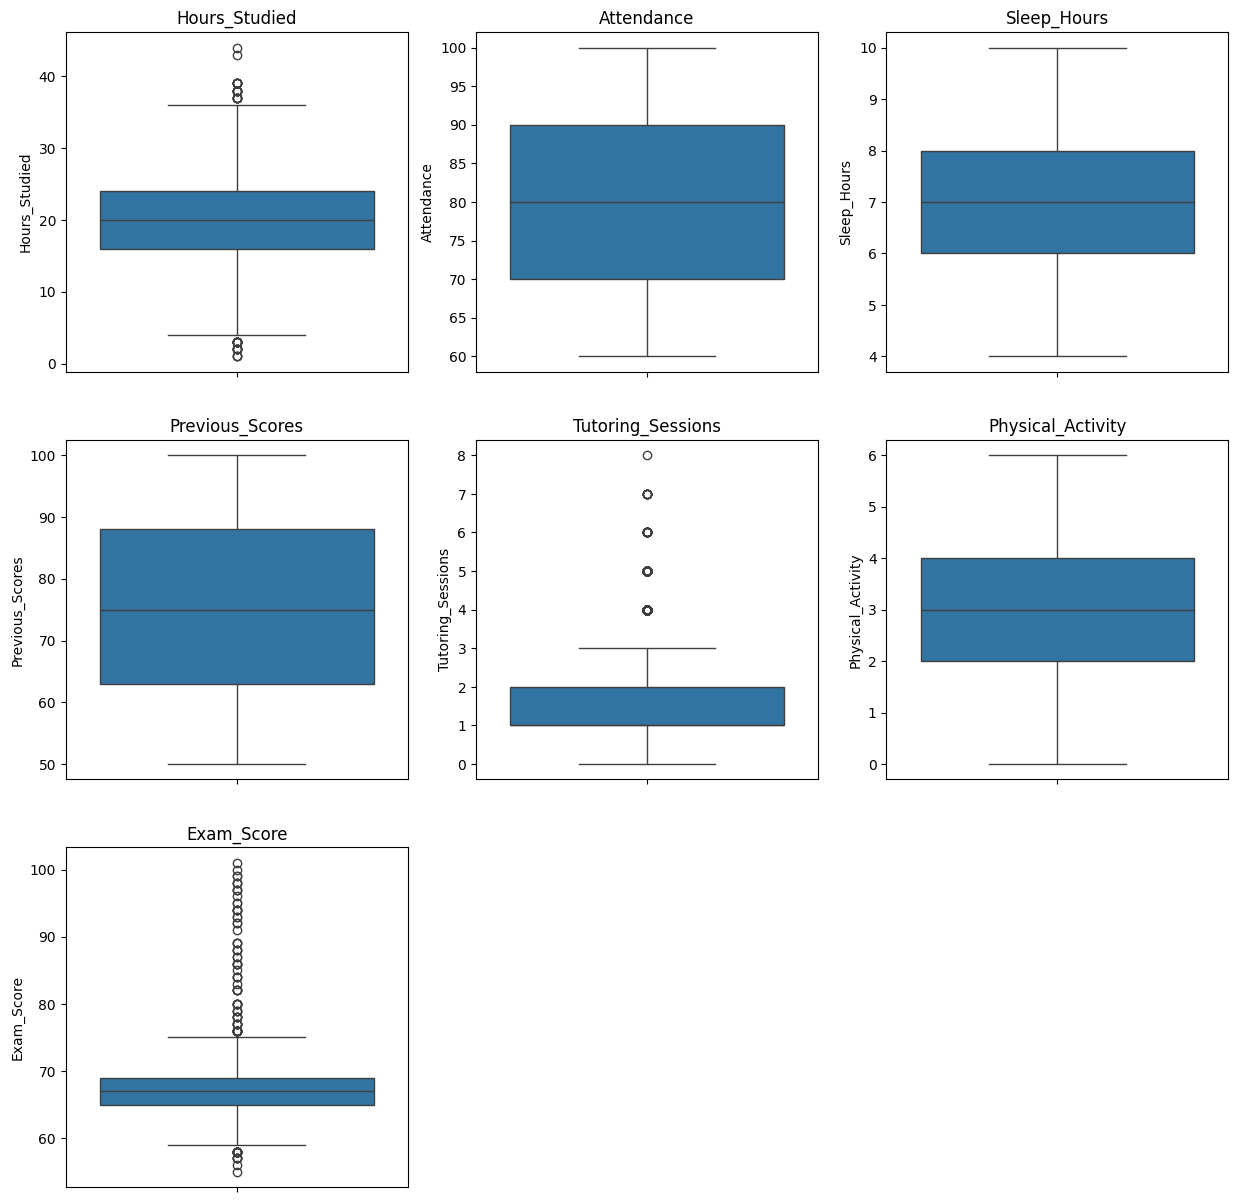

In [18]:
# Checking outliers in numerical columns using boxplot
plt.figure(figsize=(15,15))
Numericals=['Hours_Studied','Attendance','Sleep_Hours','Previous_Scores','Tutoring_Sessions','Physical_Activity','Exam_Score']
plot=1
for i in Numericals:
    plt.subplot(3,3,plot)
    sns.boxplot(df[i])
    plt.title(i)
    plot+=1

In [20]:
# Removing outliers using IQR method
Numericals=['Hours_Studied','Attendance','Sleep_Hours','Previous_Scores','Tutoring_Sessions','Physical_Activity','Exam_Score']
for i in Numericals:
    flag=True
    while(flag):
        q25,q75=np.percentile(df[i],[25,75])
        IQR=q75-q25
        lower_limit=q25-1.5*IQR
        upper_limit=q75+1.5*IQR
        if(df[i]<lower_limit).sum() or (df[i]>upper_limit).sum():
            df[i]=np.where(df[i]>upper_limit,upper_limit,df[i])
            df[i]=np.where(df[i]<lower_limit,upper_limit,df[i])
            flag=True
        else:
            flag=False

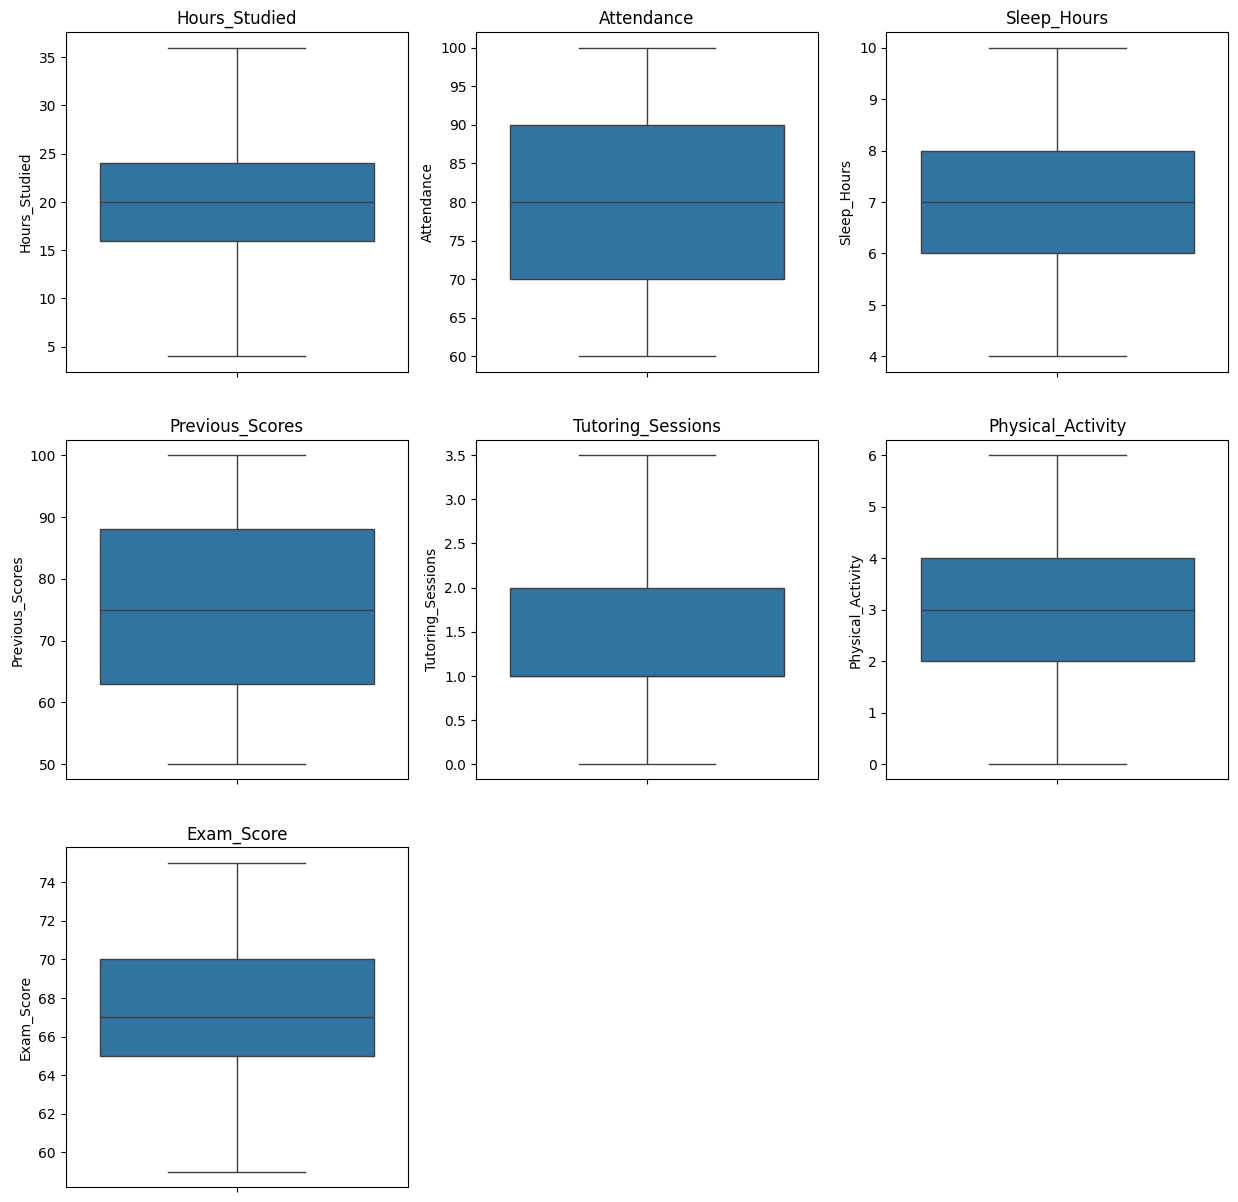

In [22]:
#Rechecking
plt.figure(figsize=(15,15))
Numericals=['Hours_Studied','Attendance','Sleep_Hours','Previous_Scores','Tutoring_Sessions','Physical_Activity','Exam_Score']
plot=1
for i in Numericals:
    plt.subplot(3,3,plot)
    sns.boxplot(df[i])
    plt.title(i)
    plot+=1

In [24]:
def calculate_grade(score):
    if score >= 80:
        return 'A'
    elif 70 <= score < 80:
        return 'B'
    elif 60 <= score < 70:
        return 'C'
    elif 50 <= score < 60:
        return 'D'
    else:
        return 'E'  
df['Grade'] = df['Exam_Score'].apply(calculate_grade)

In [28]:
# After adding new Column Grade
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Grade
0,23.0,84,Low,High,No,7,73,Low,Yes,0.0,...,Medium,Public,Positive,3,No,High School,Near,Male,67.0,C
1,19.0,64,Low,Medium,No,8,59,Low,Yes,2.0,...,Medium,Public,Negative,4,No,College,Moderate,Female,61.0,C
2,24.0,98,Medium,Medium,Yes,7,91,Medium,Yes,2.0,...,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74.0,B
3,29.0,89,Low,Medium,Yes,8,98,Medium,Yes,1.0,...,Medium,Public,Negative,4,No,High School,Moderate,Male,71.0,B
4,19.0,92,Medium,Medium,Yes,6,65,Medium,Yes,3.0,...,High,Public,Neutral,4,No,College,Near,Female,70.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25.0,69,High,Medium,No,7,76,Medium,Yes,1.0,...,Medium,Public,Positive,2,No,High School,Near,Female,68.0,C
6603,23.0,76,High,Medium,No,8,81,Medium,Yes,3.0,...,High,Public,Positive,2,No,High School,Near,Female,69.0,C
6604,20.0,90,Medium,Low,Yes,6,65,Low,Yes,3.0,...,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68.0,C
6605,10.0,86,High,High,Yes,6,91,High,Yes,2.0,...,Medium,Private,Positive,3,No,High School,Far,Female,68.0,C


In [32]:
# Converting categorical columns into numerical columns using LabelEncoder
le=LabelEncoder()
categorical=['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 
              'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities',
              'Parental_Education_Level', 'Distance_from_Home', 'Gender','Grade']
for i in categorical:
    df[i]=le.fit_transform(df[i])

In [34]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Grade
0,23.0,84,1,0,0,7,73,1,1,0.0,...,2,1,2,3,0,1,2,1,67.0,1
1,19.0,64,1,2,0,8,59,1,1,2.0,...,2,1,0,4,0,0,1,0,61.0,1
2,24.0,98,2,2,1,7,91,2,1,2.0,...,2,1,1,4,0,2,2,1,74.0,0
3,29.0,89,1,2,1,8,98,2,1,1.0,...,2,1,0,4,0,1,1,1,71.0,0
4,19.0,92,2,2,1,6,65,2,1,3.0,...,0,1,1,4,0,0,2,0,70.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25.0,69,0,2,0,7,76,2,1,1.0,...,2,1,2,2,0,1,2,0,68.0,1
6603,23.0,76,0,2,0,8,81,2,1,3.0,...,0,1,2,2,0,1,2,0,69.0,1
6604,20.0,90,2,1,1,6,65,1,1,3.0,...,2,1,0,2,0,2,2,0,68.0,1
6605,10.0,86,0,0,1,6,91,0,1,2.0,...,2,0,2,3,0,1,0,0,68.0,1


In [36]:
# Split -Dependent and Independent Variables
x=df.drop(['Grade'],axis=1)
x

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23.0,84,1,0,0,7,73,1,1,0.0,1,2,1,2,3,0,1,2,1,67.0
1,19.0,64,1,2,0,8,59,1,1,2.0,2,2,1,0,4,0,0,1,0,61.0
2,24.0,98,2,2,1,7,91,2,1,2.0,2,2,1,1,4,0,2,2,1,74.0
3,29.0,89,1,2,1,8,98,2,1,1.0,2,2,1,0,4,0,1,1,1,71.0
4,19.0,92,2,2,1,6,65,2,1,3.0,2,0,1,1,4,0,0,2,0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25.0,69,0,2,0,7,76,2,1,1.0,0,2,1,2,2,0,1,2,0,68.0
6603,23.0,76,0,2,0,8,81,2,1,3.0,1,0,1,2,2,0,1,2,0,69.0
6604,20.0,90,2,1,1,6,65,1,1,3.0,1,2,1,0,2,0,2,2,0,68.0
6605,10.0,86,0,0,1,6,91,0,1,2.0,1,2,0,2,3,0,1,0,0,68.0


In [38]:
y=df.Grade
y

0       1
1       1
2       0
3       0
4       0
       ..
6602    1
6603    1
6604    1
6605    1
6606    1
Name: Grade, Length: 6607, dtype: int32

In [56]:
models = {
    'Logistic': {'model': LogisticRegression()},
    'Decision': {'model': DecisionTreeClassifier()},
    'Random': {'model': RandomForestClassifier()},
    'SVC': {'model': SVC()},
    'Catboost': {"model": CatBoostClassifier(silent=True)},
    'Gaussian': {"model": GaussianNB()},
    'KNeighbour': {"model": KNeighborsClassifier()}
}
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = []
accuracy = []

for model_name, model_info in models.items():
    model = model_info['model']
    model_scores = []

    for train_index, test_index in kf.split(x, y):
        xtrain, xtest = x.iloc[train_index], x.iloc[test_index]
        ytrain, ytest = y.iloc[train_index], y.iloc[test_index]

        model.fit(xtrain, ytrain)
        acc = model.score(xtest, ytest)
        model_scores.append(acc)

    avg_accuracy = np.mean(model_scores)
    scores.append({'model': model_name, 'scores': model_scores})
    accuracy.append({'model': model_name, 'accuracy': avg_accuracy})

for result in accuracy:
    print(f"{result['model']} - Original Accuracy: {result['accuracy']}")

Logistic - Original Accuracy: 0.8271494063173337
Decision - Original Accuracy: 1.0
Random - Original Accuracy: 0.9995459129876678
SVC - Original Accuracy: 0.9402120295236787
Catboost - Original Accuracy: 1.0
Gaussian - Original Accuracy: 0.9660961353321413
KNeighbour - Original Accuracy: 0.9299216063815156


In [58]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=48)
print(len(xtrain), len(ytrain))
print(len(xtest), len(ytest))

4624 4624
1983 1983


In [60]:
# Hyperparameter Tuning
rf_param_grid = {
    'n_estimators': [300, 500],
    'max_depth': [15, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt'] }

rf_model = RandomForestClassifier()
rf_gs = GridSearchCV(rf_model, rf_param_grid, cv=3, n_jobs=-1)
print("Tuning RandomForest...")
rf_gs.fit(xtrain, ytrain)
rf_score = {'model': 'RandomForest', 'best_params': rf_gs.best_params_, 'best_score': rf_gs.best_score_}
print("RandomForest tuning completed!")

dt_param_grid = {
    'max_depth': [15, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'criterion': ['gini'],
    'splitter': ['best'],
    'max_features': ['sqrt'] }

dt_model = DecisionTreeClassifier()
dt_gs = GridSearchCV(dt_model, dt_param_grid, cv=3, n_jobs=-1)
print("Tuning DecisionTree...")
dt_gs.fit(xtrain, ytrain)
dt_score = {'model': 'DecisionTree', 'best_params': dt_gs.best_params_, 'best_score': dt_gs.best_score_}
print("DecisionTree tuning completed!")

catboost_param_grid = {
    'iterations': [200, 500],
    'depth': [6, 8],
    'learning_rate': [0.05, 0.1],
    'l2_leaf_reg': [3],
    'border_count': [64],
    'bagging_temperature': [0.5],
    'min_data_in_leaf': [5] }

catboost_model = CatBoostClassifier(thread_count=-1, verbose=1)
catboost_gs = GridSearchCV(catboost_model, catboost_param_grid, cv=3, n_jobs=-1)
print("Tuning CatBoost...")
catboost_gs.fit(xtrain, ytrain)
catboost_score = {'model': 'CatBoost', 'best_params': catboost_gs.best_params_, 'best_score': catboost_gs.best_score_}
print("CatBoost tuning completed!")

scores = [catboost_score, rf_score, dt_score]

for score in scores:
    print(f"{score['model']} - Best Parameters: {score['best_params']}, Best Score: {score['best_score']}")

Tuning RandomForest...
RandomForest tuning completed!
Tuning DecisionTree...
DecisionTree tuning completed!
Tuning CatBoost...
0:	learn: 1.0099287	total: 5.07ms	remaining: 1.01s
1:	learn: 0.9312235	total: 10.1ms	remaining: 999ms
2:	learn: 0.8605342	total: 14.3ms	remaining: 940ms
3:	learn: 0.7983696	total: 18.1ms	remaining: 887ms
4:	learn: 0.7419804	total: 21.8ms	remaining: 849ms
5:	learn: 0.6940752	total: 25.9ms	remaining: 838ms
6:	learn: 0.6494912	total: 29.5ms	remaining: 813ms
7:	learn: 0.6077738	total: 33.2ms	remaining: 797ms
8:	learn: 0.5694329	total: 36.9ms	remaining: 783ms
9:	learn: 0.5357291	total: 40.5ms	remaining: 770ms
10:	learn: 0.5041012	total: 44.6ms	remaining: 767ms
11:	learn: 0.4739335	total: 47.6ms	remaining: 746ms
12:	learn: 0.4457173	total: 51.3ms	remaining: 738ms
13:	learn: 0.4202896	total: 55.2ms	remaining: 733ms
14:	learn: 0.3971590	total: 59.1ms	remaining: 729ms
15:	learn: 0.3741621	total: 62.6ms	remaining: 720ms
16:	learn: 0.3526164	total: 66.7ms	remaining: 718ms

In [64]:
scores

[{'model': 'CatBoost',
  'best_params': {'bagging_temperature': 0.5,
   'border_count': 64,
   'depth': 6,
   'iterations': 200,
   'l2_leaf_reg': 3,
   'learning_rate': 0.05,
   'min_data_in_leaf': 5},
  'best_score': 1.0},
 {'model': 'RandomForest',
  'best_params': {'max_depth': 15,
   'max_features': 'sqrt',
   'min_samples_leaf': 2,
   'min_samples_split': 5,
   'n_estimators': 300},
  'best_score': 0.9956747868395013},
 {'model': 'DecisionTree',
  'best_params': {'criterion': 'gini',
   'max_depth': 20,
   'max_features': 'sqrt',
   'min_samples_leaf': 2,
   'min_samples_split': 10,
   'splitter': 'best'},
  'best_score': 0.9948091269811211}]

In [66]:
model=CatBoostClassifier(learning_rate=0.05,l2_leaf_reg=3,iterations=200,depth=6,border_count= 64,bagging_temperature=0.5,min_data_in_leaf=5)
model.fit(xtrain,ytrain)

0:	learn: 1.0099287	total: 7.83ms	remaining: 1.56s
1:	learn: 0.9312235	total: 14.3ms	remaining: 1.41s
2:	learn: 0.8605342	total: 20.7ms	remaining: 1.36s
3:	learn: 0.7983696	total: 27.6ms	remaining: 1.35s
4:	learn: 0.7419804	total: 33.2ms	remaining: 1.29s
5:	learn: 0.6940752	total: 130ms	remaining: 4.22s
6:	learn: 0.6494912	total: 136ms	remaining: 3.74s
7:	learn: 0.6077738	total: 140ms	remaining: 3.37s
8:	learn: 0.5694329	total: 145ms	remaining: 3.08s
9:	learn: 0.5357291	total: 159ms	remaining: 3.01s
10:	learn: 0.5041012	total: 165ms	remaining: 2.83s
11:	learn: 0.4739335	total: 172ms	remaining: 2.7s
12:	learn: 0.4457173	total: 179ms	remaining: 2.57s
13:	learn: 0.4202896	total: 186ms	remaining: 2.47s
14:	learn: 0.3971590	total: 191ms	remaining: 2.35s
15:	learn: 0.3741621	total: 195ms	remaining: 2.25s
16:	learn: 0.3526164	total: 201ms	remaining: 2.16s
17:	learn: 0.3334221	total: 206ms	remaining: 2.08s
18:	learn: 0.3148630	total: 212ms	remaining: 2.02s
19:	learn: 0.2980691	total: 218ms	rem

In [68]:
xtrain

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
277,16.0,67,2,0,0,7,89,0,1,3.0,1,2,1,2,3,0,0,2,1,66.0
159,24.0,64,2,2,1,8,90,0,1,0.0,1,0,1,0,3,0,1,2,1,65.0
2058,22.0,79,2,2,1,7,71,2,1,2.0,1,2,0,1,2,0,0,1,1,66.0
4125,13.0,77,0,0,1,7,69,2,1,2.0,1,0,0,1,5,0,0,1,1,67.0
6407,22.0,67,0,0,1,10,55,2,1,1.0,1,2,1,2,2,0,1,1,1,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5952,16.0,66,2,2,1,7,53,0,1,2.0,2,2,1,0,2,0,2,1,1,62.0
2395,11.0,63,0,0,1,5,85,0,0,0.0,1,0,1,2,4,1,1,1,0,62.0
5572,18.0,97,0,1,1,7,79,2,1,3.0,0,2,0,2,3,0,1,0,1,71.0
1361,23.0,64,2,2,0,6,51,2,1,1.0,2,2,1,2,5,0,0,2,1,64.0


In [70]:
ytrain

277     1
159     1
2058    1
4125    1
6407    1
       ..
5952    1
2395    1
5572    0
1361    1
2611    1
Name: Grade, Length: 4624, dtype: int32

In [72]:
model.score(xtest,ytest)

1.0

In [80]:
label= ['A','B','C','D','E']

In [82]:
# testing with existing data
output1 = model.predict([[23.0,84,1,0,0,7,73,1,1,0.0,1,2,1,2,3,0,1,2,1,67.0]])[0]
output1 = int(output1)
print(label[output1])

B


In [84]:
# testing with existing data
output2 = model.predict([[18.0,97,0,1,1,7,79,2,1,3.0,0,2,0,2,3,0,1,0,1,71.0]])[0]
output2 = int(output2)
print(label[output2])

A


In [86]:
# giving new data for predicition
output3 = model.predict([[10.0,90,0,1,1,6,79,2,1,3.0,0,1,0,2,2,1,1,0,0,51.0]])[0]
output3 = int(output3)
print(label[output3])

C


In [88]:
# giving new data for predicition
output4 = model.predict([[20.0,89,0,2,0,5,72,1,0,2.0,0,1,0,2,0,2,3,0,0,95.0]])[0]
output4 = int(output4)
print(label[output4])

A


In [90]:
ypred=model.predict(xtest)
ypred

array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [92]:
cm=confusion_matrix(ytest,ypred)
cm

array([[ 506,    0,    0],
       [   0, 1457,    0],
       [   0,    0,   20]], dtype=int64)

<Axes: >

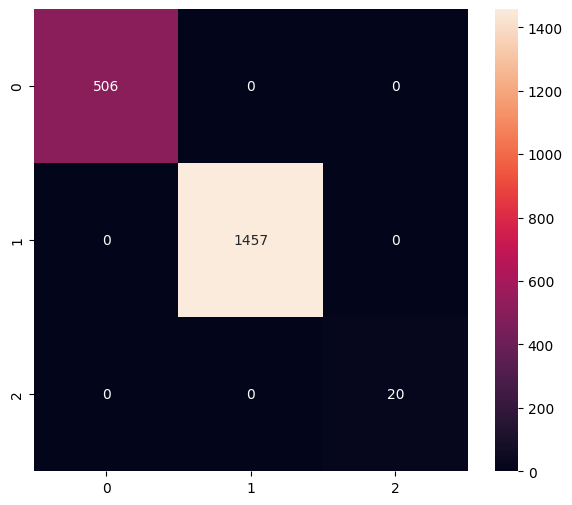

In [102]:
plt.figure(figsize=(7, 6))
sns.heatmap(cm,annot=True,fmt='d')

In [104]:
print("Accuracy Score : ",accuracy_score(ytest,ypred))

Accuracy Score :  1.0
